# Exploratory Data Analysis - MENTAL  HEALTH

Este proyecto busca explorar los factores que pueden estar relacionados con la ansiedad y depresión en trabajadores. El objetivo del siguiente archivo es la limpieza y categorización de los datos para una posterior mejor visualizacion de estos. 

## 1️⃣ Preparación del entorno

In [113]:
# Instalar librerías

%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install matplotlib.pyplot

13477.25s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
Note: you may need to restart the kernel to use updated packages.
13485.64s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
Note: you may need to restart the kernel to use updated packages.
13493.79s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
Note: you may need to restart the kernel to use updated packages.
13501.94s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
Note: you may need to restart the kernel to use updated packages.
13510.26s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot
Note: you may need to restart the kernel to use updated packages.


In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2️⃣ Carga de datasets

### Descripción del conjunto de datos

El siguiente conjunto de datos contine 10.000 filas, es decir, respuestas. Estas respuestas son de personas encuestadas en sus respectivos puestos de trabajo. 

In [115]:
df = pd.read_csv('mental_health_dataset.csv')

In [116]:
df.head()

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,Male,Employed,On-site,Yes,Yes,6,6.2,3,28,17,54,59.7,High
1,46,Female,Student,On-site,No,Yes,10,9.0,4,30,11,85,54.9,High
2,32,Female,Employed,On-site,Yes,No,7,7.7,2,24,7,62,61.3,Medium
3,60,Non-binary,Self-employed,On-site,No,No,4,4.5,4,6,0,95,97.0,Low
4,25,Female,Self-employed,On-site,Yes,Yes,3,5.4,0,24,12,70,69.0,High


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     10000 non-null  int64  
 1   gender                  10000 non-null  object 
 2   employment_status       10000 non-null  object 
 3   work_environment        10000 non-null  object 
 4   mental_health_history   10000 non-null  object 
 5   seeks_treatment         10000 non-null  object 
 6   stress_level            10000 non-null  int64  
 7   sleep_hours             10000 non-null  float64
 8   physical_activity_days  10000 non-null  int64  
 9   depression_score        10000 non-null  int64  
 10  anxiety_score           10000 non-null  int64  
 11  social_support_score    10000 non-null  int64  
 12  productivity_score      10000 non-null  float64
 13  mental_health_risk      10000 non-null  object 
dtypes: float64(2), int64(6), object(6)
memo

### Comprobación de nulos

In [118]:
print("\n❓ Valores nulos - Mental Health dataset:")
display(df.isnull().sum())


❓ Valores nulos - Mental Health dataset:


age                       0
gender                    0
employment_status         0
work_environment          0
mental_health_history     0
seeks_treatment           0
stress_level              0
sleep_hours               0
physical_activity_days    0
depression_score          0
anxiety_score             0
social_support_score      0
productivity_score        0
mental_health_risk        0
dtype: int64

### Detección y visualización de outliers

In [119]:
num_cols = df.select_dtypes(include=["int", "float"]).columns

print(f"📊 Variables numéricas analizadas: {list(num_cols)}\n")

📊 Variables numéricas analizadas: ['age', 'stress_level', 'sleep_hours', 'physical_activity_days', 'depression_score', 'anxiety_score', 'social_support_score', 'productivity_score']



In [120]:
# Función para calcular outliers con método IQR (Interquartile Range)
def detectar_outliers(col):
    Q1 = df[col].quantile(0.25) # 1er cuartil (25% de los datos)
    Q3 = df[col].quantile(0.75) # 3er cuartil (75% de los datos)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR # Límite inferior
    upper = Q3 + 1.5 * IQR # Límite superior

    # Filtrar filas donde la columna está fuera de los límites
    outliers = df[(df[col] < lower) | (df[col] > upper)]

    # Retorna: cantidad de outliers, límite inferior, límite superior
    return outliers.shape[0], lower, upper

# Se considera un valor atípico si está muy lejos del rango central

In [121]:
# Resumen de outliers por variable

# Creamos un diccionario vacío donde vamos a guardar el resumen de outliers
outliers_resumen = {}

# Aplicamos la función detectar_outliers a cada columna
for col in num_cols:
    n_out, low, up = detectar_outliers(col)

    # Guardamos los resultados en el diccionario outliers_resumen
    outliers_resumen[col] = {
        "N_outliers": n_out,
        "Límite inferior": round(low, 2), # redondeamos a 2 decimales
        "Límite superior": round(up, 2) # redondeamos a 2 decimales
    }

In [122]:
# Mostrar tabla de resumen
outliers_df = pd.DataFrame(outliers_resumen).T
display(outliers_df)
### Lectura de los ouliners: n_outliers_ numero de valores atipicos detectados en esa variable, valor minimo aceptable dentro del radon normal y limite superior valor máximo dentro del rango normal. En los datos numericos no se encuentran outliers. 

,N_outliers,Límite inferior,Límite superior
age,0.0,-4.5,87.5
stress_level,0.0,-4.5,15.5
sleep_hours,0.0,2.5,10.5
physical_activity_days,0.0,-2.5,9.5
depression_score,0.0,-17.0,47.0
anxiety_score,0.0,-11.5,32.5
social_support_score,0.0,-51.5,152.5
productivity_score,0.0,30.7,124.3


In [123]:
df.dtypes

age                         int64
gender                     object
employment_status          object
work_environment           object
mental_health_history      object
seeks_treatment            object
stress_level                int64
sleep_hours               float64
physical_activity_days      int64
depression_score            int64
anxiety_score               int64
social_support_score        int64
productivity_score        float64
mental_health_risk         object
dtype: object

In [124]:
columnas_df_objeto = df.select_dtypes(include='object').columns
print(columnas_df_objeto)


Index(['gender', 'employment_status', 'work_environment',
       'mental_health_history', 'seeks_treatment', 'mental_health_risk'],
      dtype='object')


In [125]:
for col in columnas_df_objeto: 
    print(f"\n {col}")
    print(df[col].unique())


 gender
['Male' 'Female' 'Non-binary' 'Prefer not to say']

 employment_status
['Employed' 'Student' 'Self-employed' 'Unemployed']

 work_environment
['On-site' 'Remote' 'Hybrid']

 mental_health_history
['Yes' 'No']

 seeks_treatment
['Yes' 'No']

 mental_health_risk
['High' 'Medium' 'Low']


## 3️⃣ Categorización de variables


anxiety_score : GAD-7 (Generalized Anxiety Disorder-7)  The GAD-7 total score for the seven items ranges from 0 to 21. Scores of 5, 10, and 15 represent cut points for mild, moderate, and severe anxiety, respectively.”


| PUNTAJE TOTAL | NIVEL DE ANSIEDAD     |
|---------------|---------------------|
| 0 - 4         | Mínimo o ninguno     |
| 5 - 9         | Leve                 |
| 10 - 14       | Moderado             |
| 15 - 21       | Severo               |

depression_score: Test PHQ-9 – Cuestionario de Salud del Paciente (Patient Health Questionnaire-9), “The PHQ-9 scores each of the 9 DSM-IV criteria from ‘0’ (not at all) to ‘3’ (nearly every day), providing a 0–27 severity score. Depression severity is categorized as follows: 5–9 mild, 10–14 moderate, 15–19 moderately severe, and 20–27 severe.”

| Puntuación total | Nivel de depresión    |
|-----------------|------------------------|
| 0–4             | Mínimo o ninguno       |
| 5–9             | Leve                   |
| 10–14           | Moderado               |
| 15–19           | Moderadamente grave    |
| 20–27           | Severo                 |


#### Creación de las nuevas variables categorizadas

In [126]:
# Contar cuántos valores son mayores a 27
cantidad_fuera_rango = (df['depression_score'] > 27).sum()
print("Cantidad de filas con depression_score > 27:", cantidad_fuera_rango)

Cantidad de filas con depression_score > 27: 1015


In [127]:
df.loc[df["depression_score"]>27, "depression_score"] = df["depression_score"].median()

In [128]:
# Contar cuántos valores son mayores a 27
imputacion_depression = (df['depression_score'] > 27).sum()
print("Cantidad de filas con depression_score > 27:", imputacion_depression)

Cantidad de filas con depression_score > 27: 0


In [129]:
categorizacion_depresion= []

for score in df["depression_score"]:
    if 0 <= score <= 4:
        categorizacion_depresion.append ("Mínimo o ninguno")
    elif 5 <= score <= 9:
        categorizacion_depresion.append ("Leve")
    elif 10 <= score <= 14:
        categorizacion_depresion.append ("Moderada")
    elif 15 <= score <= 19:
        categorizacion_depresion.append ("Moderadamente grave")
    elif 20 <= score <= 27:
        categorizacion_depresion.append ("Severo")
    else: 
        categorizacion_depresion.append ("Fuera del rango")

df["nivel_depresion"] = categorizacion_depresion

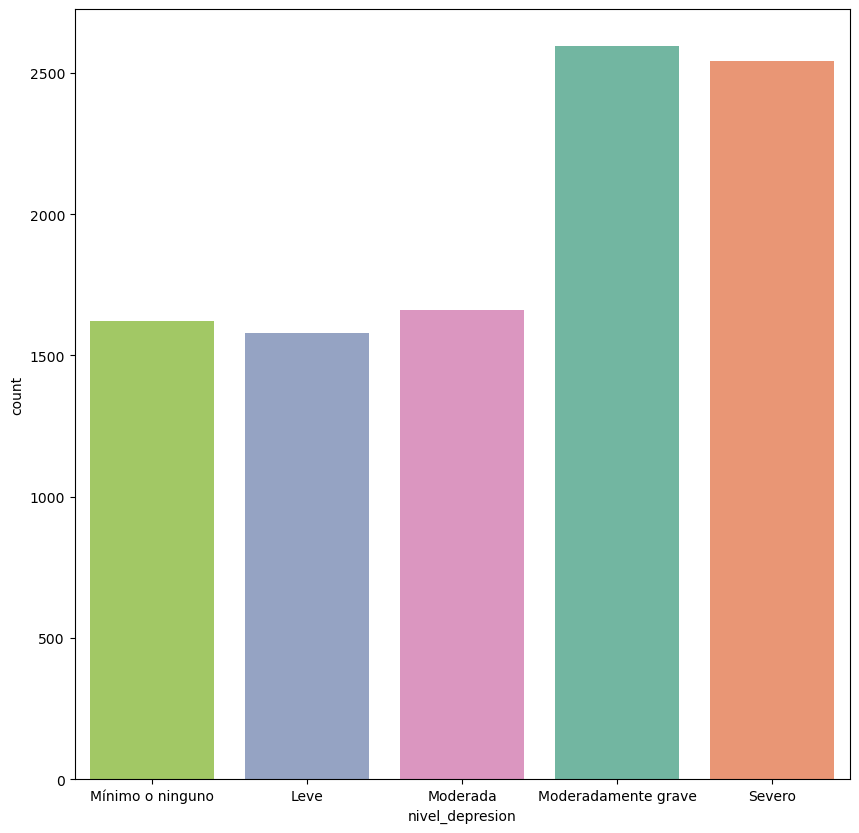

In [130]:
orden_categorias_depresion = [
    "Mínimo o ninguno",
    "Leve",
    "Moderada",
    "Moderadamente grave",
    "Severo",
]

plt.figure(figsize=(10,10))
sns.countplot(
    x='nivel_depresion', 
    data=df, 
    hue='nivel_depresion', 
    palette='Set2', 
    legend=False,
    order=orden_categorias_depresion  # <-- aquí indicamos el orden
)
plt.show()

In [131]:
# Contar cuántos valores son mayores a 21
cantidad_fuera_rango_ansiedad = (df['anxiety_score'] > 21).sum()
print("Cantidad de filas con anxiety_score > 21:", cantidad_fuera_rango_ansiedad)

Cantidad de filas con anxiety_score > 21: 0


In [132]:
categorizacion_ansiedad = []

for score in df["anxiety_score"]:
    if 0 <= score <= 4:
        categorizacion_ansiedad.append("Mínimo o ninguno")
    elif 5 <= score <= 9:
        categorizacion_ansiedad.append("Leve")
    elif 10 <= score <= 14:
        categorizacion_ansiedad.append("Moderado")
    elif 15 <= score <= 21:
        categorizacion_ansiedad.append("Severo")
    else:
        categorizacion_ansiedad.append("Fuera de rango")  

df["nivel_ansiedad"] = categorizacion_ansiedad

print(df[["anxiety_score", "nivel_ansiedad"]])


      anxiety_score    nivel_ansiedad
0                17            Severo
1                11          Moderado
2                 7              Leve
3                 0  Mínimo o ninguno
4                12          Moderado
...             ...               ...
9995             21            Severo
9996             12          Moderado
9997             18            Severo
9998             21            Severo
9999             16            Severo

[10000 rows x 2 columns]


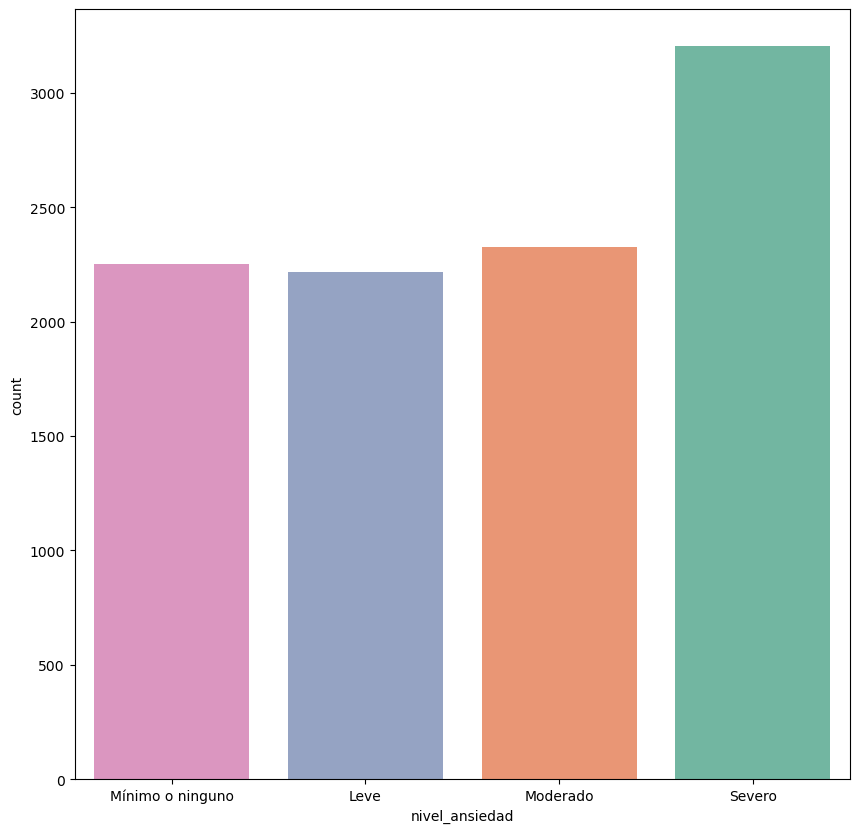

In [133]:
orden_categorias_ansiedad = [
    "Mínimo o ninguno",
    "Leve",
    "Moderado",
    "Severo"
]

plt.figure(figsize=(10,10))
sns.countplot(
    x='nivel_ansiedad', 
    data=df, 
    hue='nivel_ansiedad', 
    palette='Set2', 
    legend=False,
    order=orden_categorias_ansiedad  # <-- aquí indicamos el orden
)
plt.show()

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     10000 non-null  int64  
 1   gender                  10000 non-null  object 
 2   employment_status       10000 non-null  object 
 3   work_environment        10000 non-null  object 
 4   mental_health_history   10000 non-null  object 
 5   seeks_treatment         10000 non-null  object 
 6   stress_level            10000 non-null  int64  
 7   sleep_hours             10000 non-null  float64
 8   physical_activity_days  10000 non-null  int64  
 9   depression_score        10000 non-null  int64  
 10  anxiety_score           10000 non-null  int64  
 11  social_support_score    10000 non-null  int64  
 12  productivity_score      10000 non-null  float64
 13  mental_health_risk      10000 non-null  object 
 14  nivel_depresion         10000 non-null 

In [135]:
categorizacion_edad = []

for i in df["age"]:
    if 18 <= i <= 24:
        categorizacion_edad.append("18-24 años")
    elif 25 <= i <= 34:
        categorizacion_edad.append("25-34 años")
    elif 35 <= i <= 44:
        categorizacion_edad.append("35-44 años")
    elif 45 <= i <= 65:
        categorizacion_edad.append("45-65 años")
    else:
        categorizacion_edad.append("Fuera de rango")

df["edad_grupos"] = categorizacion_edad

print(df[["age", "edad_grupos"]])


      age edad_grupos
0      56  45-65 años
1      46  45-65 años
2      32  25-34 años
3      60  45-65 años
4      25  25-34 años
...   ...         ...
9995   34  25-34 años
9996   47  45-65 años
9997   56  45-65 años
9998   24  18-24 años
9999   44  35-44 años

[10000 rows x 2 columns]


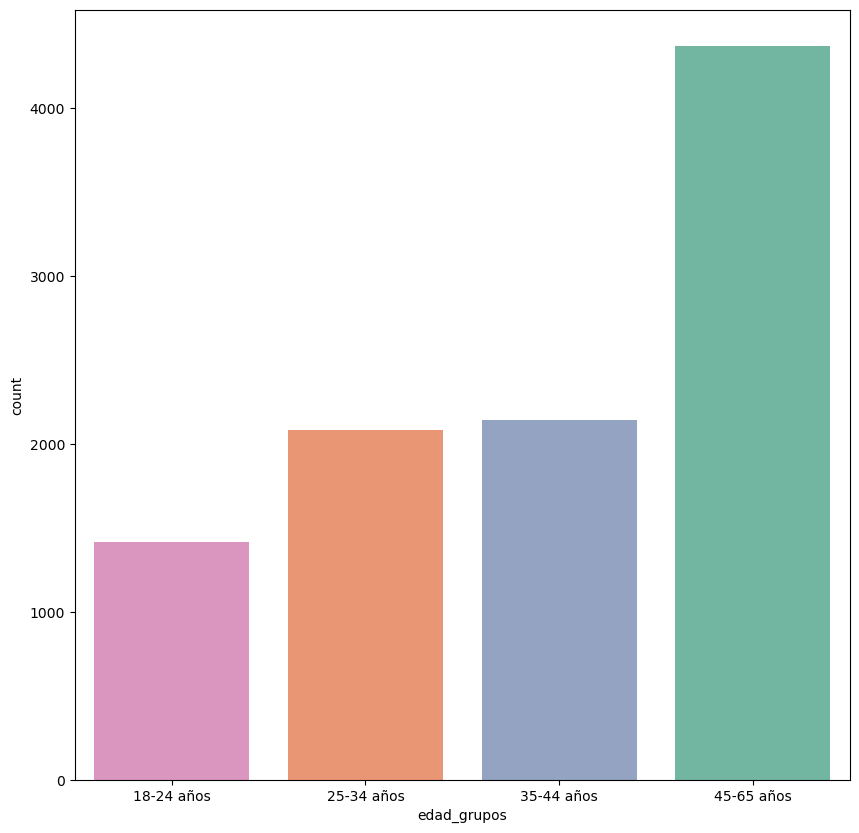

In [136]:
orden_categorias_edad = [
    "18-24 años",
    "25-34 años",
    "35-44 años",
    "45-65 años"
]

plt.figure(figsize=(10,10))
sns.countplot(
    x='edad_grupos', 
    data=df, 
    hue='edad_grupos', 
    palette='Set2', 
    legend=False,
    order=orden_categorias_edad  # <-- aquí indicamos el orden
)
plt.show()

In [137]:
categorizacion_estres = []

for i in df["stress_level"]:
    if 0 <= i <= 3:
        categorizacion_estres.append("Bajo")
    elif 4 <= i <= 6:
        categorizacion_estres.append("Moderado")
    elif 7 <= i <= 8:
        categorizacion_estres.append("Alto")
    elif 9 <= i <= 11:
        categorizacion_estres.append("Muy alto")
    else:
        categorizacion_estres.append("Fuera de rango")

df["estres_level_agrupado"] = categorizacion_estres

print(df[["stress_level", "estres_level_agrupado"]])


      stress_level estres_level_agrupado
0                6              Moderado
1               10              Muy alto
2                7                  Alto
3                4              Moderado
4                3                  Bajo
...            ...                   ...
9995             5              Moderado
9996             1                  Bajo
9997             1                  Bajo
9998             9              Muy alto
9999             5              Moderado

[10000 rows x 2 columns]


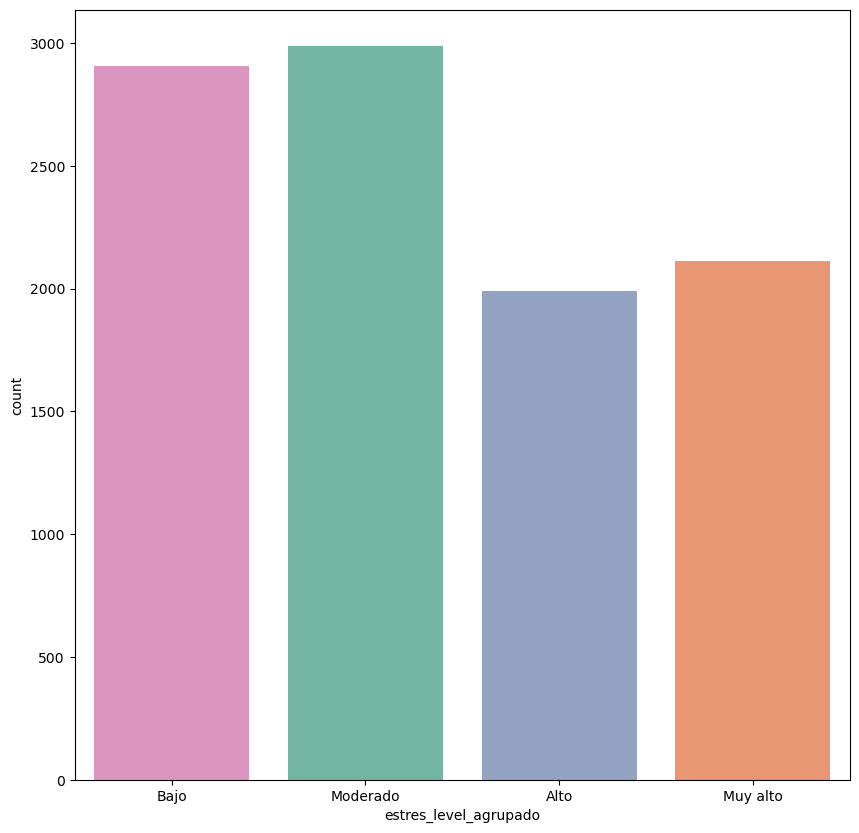

In [138]:
orden_categorias_estres = [
    "Bajo",
    "Moderado",
    "Alto",
    "Muy alto"
]

plt.figure(figsize=(10,10))
sns.countplot(
    x='estres_level_agrupado', 
    data=df, 
    hue='estres_level_agrupado', 
    palette='Set2', 
    legend=False,
    order=orden_categorias_estres  # <-- aquí indicamos el orden
)
plt.show()

In [139]:
categorizacion_sueño = []

for i in df["sleep_hours"]:
    if 0 <= i <= 5:
        categorizacion_sueño.append("<4h")
    elif 5 <= i <= 7:
        categorizacion_sueño.append("5-6h")
    elif 7 <= i <= 9:
        categorizacion_sueño.append("7-8h")
    else:
        categorizacion_sueño.append(">9h")

df["sueño_agrupado"] = categorizacion_sueño

print(df[["sleep_hours", "sueño_agrupado"]])

      sleep_hours sueño_agrupado
0             6.2           5-6h
1             9.0           7-8h
2             7.7           7-8h
3             4.5            <4h
4             5.4           5-6h
...           ...            ...
9995          6.1           5-6h
9996          5.7           5-6h
9997          8.3           7-8h
9998          6.1           5-6h
9999          6.4           5-6h

[10000 rows x 2 columns]


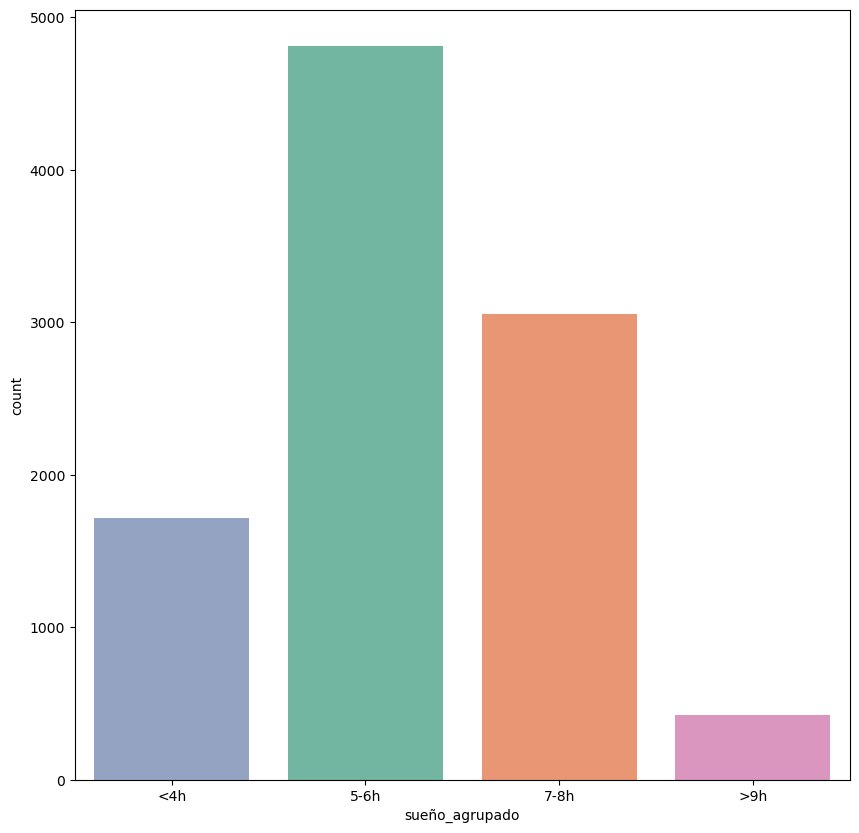

In [140]:
orden_categorias_sueño = [
    "<4h",
    "5-6h",
    "7-8h",
    ">9h"
]

plt.figure(figsize=(10,10))
sns.countplot(
    x='sueño_agrupado', 
    data=df, 
    hue='sueño_agrupado', 
    palette='Set2', 
    legend=False,
    order=orden_categorias_sueño  # <-- aquí indicamos el orden
)
plt.show()

In [141]:
categorizacion_actividad = []

for i in df["physical_activity_days"]:
    if i == 0:
        categorizacion_actividad.append("0 días")
    elif 1 <= i <= 2:
        categorizacion_actividad.append("1-2 días")
    elif 3 <= i <= 4:
        categorizacion_actividad.append("3-4 días")
    elif 5 <= i <= 7:
        categorizacion_actividad.append("5-7 días")
    else:
        categorizacion_actividad.append("Fuera de rango")

df["actividad_agrupado"] = categorizacion_actividad

print(df[["physical_activity_days", "actividad_agrupado"]])

      physical_activity_days actividad_agrupado
0                          3           3-4 días
1                          4           3-4 días
2                          2           1-2 días
3                          4           3-4 días
4                          0             0 días
...                      ...                ...
9995                       3           3-4 días
9996                       3           3-4 días
9997                       0             0 días
9998                       0             0 días
9999                       7           5-7 días

[10000 rows x 2 columns]


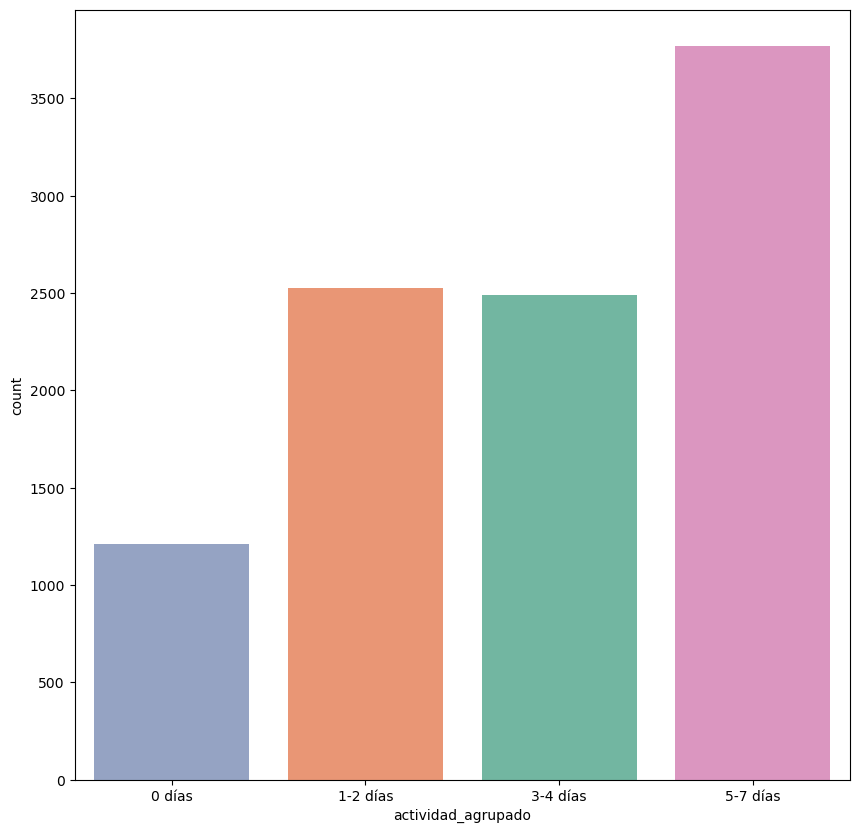

In [142]:
orden_categorias_actividad = [
    "0 días",
    "1-2 días",
    "3-4 días",
    "5-7 días"
]

plt.figure(figsize=(10,10))
sns.countplot(
    x='actividad_agrupado', 
    data=df, 
    hue='actividad_agrupado', 
    palette='Set2', 
    legend=False,
    order=orden_categorias_actividad  # <-- aquí indicamos el orden
)
plt.show()

In [143]:
categorizacion_productividad = []

for i in df["productivity_score"]:
    if 42.8 <= i <= 57.1:
        categorizacion_productividad.append("Bajo")
    elif 57.2 <= i <= 71.5:
        categorizacion_productividad.append("Medio")
    elif 71.6 <= i <= 85.9:
        categorizacion_productividad.append("Alto")
    elif 86 <= i <= 100:
        categorizacion_productividad.append("Muy alto")
    else:
        categorizacion_productividad.append("Fuera de rango")

df["productividad_agrupado"] = categorizacion_productividad

print(df[["productivity_score", "productividad_agrupado"]])


      productivity_score productividad_agrupado
0                   59.7                  Medio
1                   54.9                   Bajo
2                   61.3                  Medio
3                   97.0               Muy alto
4                   69.0                  Medio
...                  ...                    ...
9995                90.0               Muy alto
9996                90.8               Muy alto
9997                99.2               Muy alto
9998                56.7                   Bajo
9999               100.0               Muy alto

[10000 rows x 2 columns]


In [144]:
print(df["productivity_score"].isna().sum())

0


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     10000 non-null  int64  
 1   gender                  10000 non-null  object 
 2   employment_status       10000 non-null  object 
 3   work_environment        10000 non-null  object 
 4   mental_health_history   10000 non-null  object 
 5   seeks_treatment         10000 non-null  object 
 6   stress_level            10000 non-null  int64  
 7   sleep_hours             10000 non-null  float64
 8   physical_activity_days  10000 non-null  int64  
 9   depression_score        10000 non-null  int64  
 10  anxiety_score           10000 non-null  int64  
 11  social_support_score    10000 non-null  int64  
 12  productivity_score      10000 non-null  float64
 13  mental_health_risk      10000 non-null  object 
 14  nivel_depresion         10000 non-null 

/var/folders/7z/nkwh7lln1mx_fzrt6mjwyxzr0000gp/T/ipykernel_86112/2733740554.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


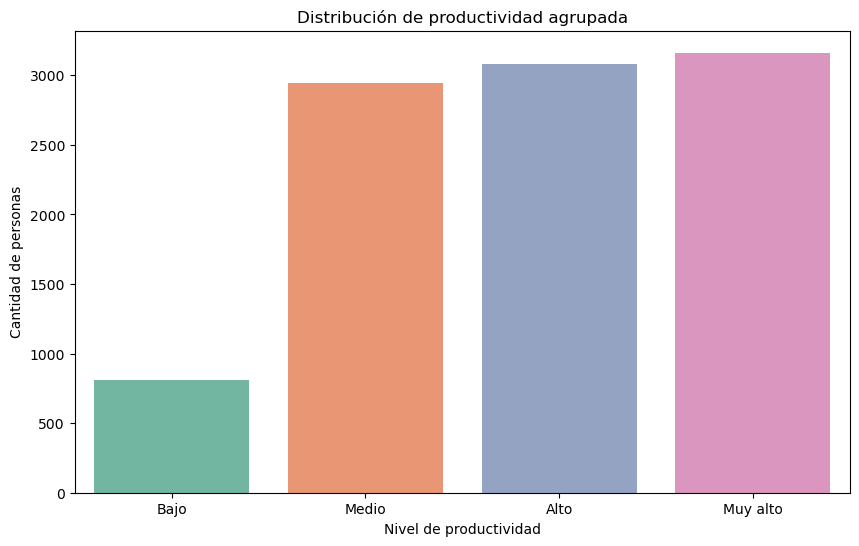

In [146]:
orden_categorias_productividad = [
    "Bajo",
    "Medio",
    "Alto",
    "Muy alto"
]

plt.figure(figsize=(10,6))
sns.countplot(
    x='productividad_agrupado',  # <--- usamos la columna categórica
    data=df,
    palette='Set2',
    order=orden_categorias_productividad
)

plt.xlabel("Nivel de productividad")
plt.ylabel("Cantidad de personas")
plt.title("Distribución de productividad agrupada")
plt.show()

In [147]:
categorizacion_social = []

for i in df["social_support_score"]:
    if 0 <= i <= 24:
        categorizacion_social.append("Bajo")
    elif 25 <= i <= 49:
        categorizacion_social.append("Medio")
    elif 50 <= i <= 74:
        categorizacion_social.append("Alto")
    elif 75 <= i <= 100:
        categorizacion_social.append("Muy alto")
    else:
        categorizacion_social.append("Fuera de rango")

df["social_support_agrupado"] = categorizacion_social

print(df[["social_support_score", "social_support_agrupado"]])

      social_support_score social_support_agrupado
0                       54                    Alto
1                       85                Muy alto
2                       62                    Alto
3                       95                Muy alto
4                       70                    Alto
...                    ...                     ...
9995                     8                    Bajo
9996                    45                   Medio
9997                     7                    Bajo
9998                    32                   Medio
9999                    25                   Medio

[10000 rows x 2 columns]


/var/folders/7z/nkwh7lln1mx_fzrt6mjwyxzr0000gp/T/ipykernel_86112/4252012642.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


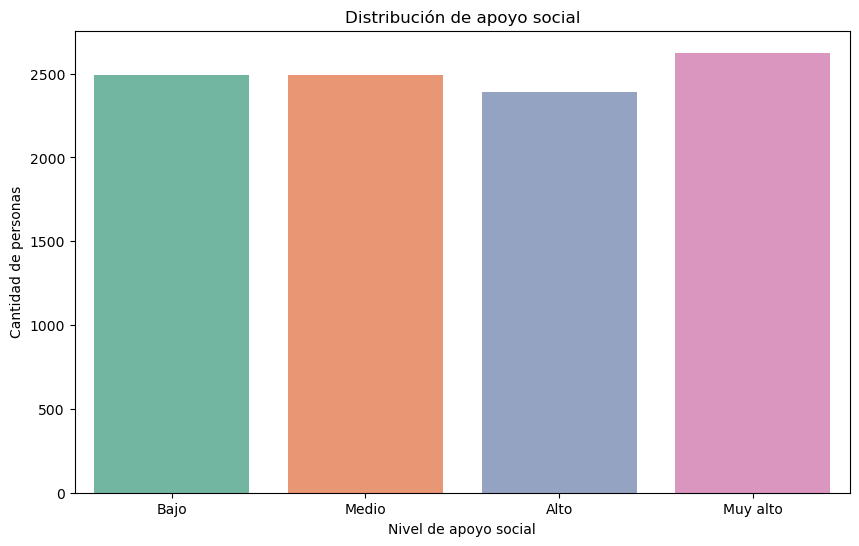

In [148]:
orden_categorias_apoyosocial = [
    "Bajo",
    "Medio",
    "Alto",
    "Muy alto"
]

plt.figure(figsize=(10,6))
sns.countplot(
    x='social_support_agrupado',
    data=df,
    palette='Set2',
    order=orden_categorias_apoyosocial
)

plt.xlabel("Nivel de apoyo social")
plt.ylabel("Cantidad de personas")
plt.title("Distribución de apoyo social")
plt.show()

In [149]:
df

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,...,productivity_score,mental_health_risk,nivel_depresion,nivel_ansiedad,edad_grupos,estres_level_agrupado,sueño_agrupado,actividad_agrupado,productividad_agrupado,social_support_agrupado
0,56,Male,Employed,On-site,Yes,Yes,6,6.2,3,15,...,59.7,High,Moderadamente grave,Severo,45-65 años,Moderado,5-6h,3-4 días,Medio,Alto
1,46,Female,Student,On-site,No,Yes,10,9.0,4,15,...,54.9,High,Moderadamente grave,Moderado,45-65 años,Muy alto,7-8h,3-4 días,Bajo,Muy alto
2,32,Female,Employed,On-site,Yes,No,7,7.7,2,24,...,61.3,Medium,Severo,Leve,25-34 años,Alto,7-8h,1-2 días,Medio,Alto
3,60,Non-binary,Self-employed,On-site,No,No,4,4.5,4,6,...,97.0,Low,Leve,Mínimo o ninguno,45-65 años,Moderado,<4h,3-4 días,Muy alto,Muy alto
4,25,Female,Self-employed,On-site,Yes,Yes,3,5.4,0,24,...,69.0,High,Severo,Moderado,25-34 años,Bajo,5-6h,0 días,Medio,Alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,34,Female,Employed,On-site,Yes,Yes,5,6.1,3,9,...,90.0,Medium,Leve,Severo,25-34 años,Moderado,5-6h,3-4 días,Muy alto,Bajo
9996,47,Male,Employed,On-site,Yes,No,1,5.7,3,5,...,90.8,Medium,Leve,Moderado,45-65 años,Bajo,5-6h,3-4 días,Muy alto,Medio
9997,56,Female,Employed,On-site,Yes,No,1,8.3,0,1,...,99.2,Medium,Mínimo o ninguno,Severo,45-65 años,Bajo,7-8h,0 días,Muy alto,Bajo
9998,24,Male,Employed,On-site,Yes,Yes,9,6.1,0,15,...,56.7,High,Moderadamente grave,Severo,18-24 años,Muy alto,5-6h,0 días,Bajo,Medio


In [150]:
df.columns

Index(['age', 'gender', 'employment_status', 'work_environment',
       'mental_health_history', 'seeks_treatment', 'stress_level',
       'sleep_hours', 'physical_activity_days', 'depression_score',
       'anxiety_score', 'social_support_score', 'productivity_score',
       'mental_health_risk', 'nivel_depresion', 'nivel_ansiedad',
       'edad_grupos', 'estres_level_agrupado', 'sueño_agrupado',
       'actividad_agrupado', 'productividad_agrupado',
       'social_support_agrupado'],
      dtype='object')

In [151]:
# -------------------------
# 1. Renombrar columnas al español
# -------------------------
rename_dict = {
    "age": "edad",
    "gender": "genero",
    "employment_status": "estado_empleo",
    "work_environment": "ambiente_laboral",
    "mental_health_history": "historial_salud_mental",
    "seeks_treatment": "busca_tratamiento",
    "stress_level": "nivel_estres",
    "sleep_hours": "horas_sueno",
    "physical_activity_days": "dias_actividad_fisica",
    "depression_score": "puntaje_depresion",
    "anxiety_score": "puntaje_ansiedad",
    "social_support_score": "puntaje_apoyo_social",
    "productivity_score": "puntaje_productividad",
    "mental_health_risk": "riesgo_salud_mental",
    "nivel_depresion": "nivel_depresion",
    "nivel_ansiedad": "nivel_ansiedad",
    "edad_grupos": "grupo_edad",
    "estres_level_agrupado": "nivel_estres_agrupado",
    "sueño_agrupado": "sueño_agrupado",
    "actividad_agrupado": "actividad_fisica_agrupado",
    "productividad_agrupado": "productividad_agrupado",
    "social_support_agrupado": "apoyo_social_agrupado"
}

df.rename(columns=rename_dict, inplace=True)



In [152]:
# -------------------------
# 2. Traducir valores de columnas categóricas
# -------------------------

df["genero"] = df["genero"].map({"Male": "Hombre", "Female": "Mujer", "Non-binary": "No binario", "Prefer not to say": "NS/NC"})
df["estado_empleo"] = df["estado_empleo"].map({
    "Employed": "Empleado",
    "Student": "Estudiante",
    "Self-employed": "Autónomo",
    "Unemployed": "Desempleado"
})
df["historial_salud_mental"] = df["historial_salud_mental"].map({"Yes": "Sí", "No": "No"})
df["busca_tratamiento"] = df["busca_tratamiento"].map({"Yes": "Sí", "No": "No"})
df["riesgo_salud_mental"] = df["riesgo_salud_mental"].map({"High": "Alto", "Medium": "Medio", "Low": "Bajo"})
df["ambiente_laboral"] = df["ambiente_laboral"].map({"Remote": "Remoto", "On-site": "Presencial", "Hybrid": "Híbrido"})




In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   edad                       10000 non-null  int64  
 1   genero                     10000 non-null  object 
 2   estado_empleo              10000 non-null  object 
 3   ambiente_laboral           10000 non-null  object 
 4   historial_salud_mental     10000 non-null  object 
 5   busca_tratamiento          10000 non-null  object 
 6   nivel_estres               10000 non-null  int64  
 7   horas_sueno                10000 non-null  float64
 8   dias_actividad_fisica      10000 non-null  int64  
 9   puntaje_depresion          10000 non-null  int64  
 10  puntaje_ansiedad           10000 non-null  int64  
 11  puntaje_apoyo_social       10000 non-null  int64  
 12  puntaje_productividad      10000 non-null  float64
 13  riesgo_salud_mental        10000 non-null  obje

In [154]:
df['genero'].value_counts(normalize=True)

genero
Hombre        0.4557
Mujer         0.4457
No binario    0.0520
NS/NC         0.0466
Name: proportion, dtype: float64

In [155]:
mask = df["genero"]!="NS/NC"
df=df[mask]

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9534 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   edad                       9534 non-null   int64  
 1   genero                     9534 non-null   object 
 2   estado_empleo              9534 non-null   object 
 3   ambiente_laboral           9534 non-null   object 
 4   historial_salud_mental     9534 non-null   object 
 5   busca_tratamiento          9534 non-null   object 
 6   nivel_estres               9534 non-null   int64  
 7   horas_sueno                9534 non-null   float64
 8   dias_actividad_fisica      9534 non-null   int64  
 9   puntaje_depresion          9534 non-null   int64  
 10  puntaje_ansiedad           9534 non-null   int64  
 11  puntaje_apoyo_social       9534 non-null   int64  
 12  puntaje_productividad      9534 non-null   float64
 13  riesgo_salud_mental        9534 non-null   object 
 1

## 4️⃣ Añadir columnas adicionales con lógica realista

In [157]:
import random

np.random.seed(42)

# 1️⃣ Convivencia basada en grupo de edad
def asignar_convivencia(grupo_edad):
    if grupo_edad == "18-24 años":
        return np.random.choice(["Con padres", "Con amigos/a", "Solo/a"], p=[0.6, 0.2, 0.2])
    elif grupo_edad == "25-34 años":
        return np.random.choice(["En pareja", "Solo/a", "Con amigos/a"], p=[0.5, 0.3, 0.2])
    elif grupo_edad == "35-44 años":
        return np.random.choice(["En pareja", "En pareja con hijos", "Solo/a"], p=[0.4, 0.4, 0.2])
    elif grupo_edad == "45-65 años":
        return np.random.choice(["En pareja con hijos", "En pareja", "Otros"], p=[0.5, 0.4, 0.1])
    else:
        return "Otros"

df["convivencia"] = df["grupo_edad"].apply(asignar_convivencia)

# 2️⃣ Convivencia con mascotas (más probable en pareja o solos)
def asignar_mascotas(convivencia):
    if convivencia in ["En pareja", "En pareja con hijos"]:
        return np.random.choice(["Perro", "Gato", "Ninguna"], p=[0.5, 0.3, 0.2])
    elif convivencia == "Solo/a":
        return np.random.choice(["Gato", "Perro", "Ninguna"], p=[0.4, 0.3, 0.3])
    elif convivencia == "Con padres":
        return np.random.choice(["Perro", "Gato", "Ninguna"], p=[0.4, 0.4, 0.2])
    else:
        return np.random.choice(["Ninguna", "Otros"], p=[0.7, 0.3])

df["convivencia_con_mascotas"] = df["convivencia"].apply(asignar_mascotas)

# 3️⃣ Problemas laborales (más frecuentes con alto estrés o ansiedad)
def asignar_problemas_laborales(row):
    if row["nivel_estres_agrupado"] in ["Alto", "Muy alto"] or row["nivel_ansiedad"] in ["Severo", "Moderado"]:
        return np.random.choice(["Sí", "No"], p=[0.7, 0.3])
    else:
        return np.random.choice(["Sí", "No"], p=[0.2, 0.8])

df["problemas_laborales"] = df.apply(asignar_problemas_laborales, axis=1)

# 4️⃣ Problemas económicos (más probables con alto estrés o depresión severa)
def asignar_problemas_economicos(row):
    if row["nivel_estres_agrupado"] in ["Muy alto"] or row["nivel_depresion"] in ["Severo", "Moderadamente grave"]:
        return np.random.choice(["Sí", "No"], p=[0.8, 0.2])
    else:
        return np.random.choice(["Sí", "No"], p=[0.3, 0.7])

df["problemas_económicos"] = df.apply(asignar_problemas_economicos, axis=1)

# 5️⃣ Región (distribución realista por población online)
df["region"] = np.random.choice(
    ["Europa", "América", "Asia", "Oceanía"], 
    size=len(df), 
    p=[0.45, 0.35, 0.15, 0.05]
)

# 6️⃣ Tipo de empresa (distribución más realista)
df["tipo_empresa"] = np.random.choice(
    ["Tech", "Educación", "Salud", "Finanzas", "Retail"], 
    size=len(df), 
    p=[0.3, 0.2, 0.15, 0.2, 0.15]
)

# -------------------------
# Verificación
# -------------------------
df[["convivencia", "convivencia_con_mascotas", "problemas_laborales", 
    "problemas_económicos", "region", "tipo_empresa"]].head()


/var/folders/7z/nkwh7lln1mx_fzrt6mjwyxzr0000gp/T/ipykernel_86112/566955477.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["convivencia"] = df["grupo_edad"].apply(asignar_convivencia)
/var/folders/7z/nkwh7lln1mx_fzrt6mjwyxzr0000gp/T/ipykernel_86112/566955477.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["convivencia_con_mascotas"] = df["convivencia"].apply(asignar_mascotas)
/var/folders/7z/nkwh7lln1mx_fzrt6mjwyxzr0000gp/T/ipykernel_86112/566955477.py:40: SettingWithCopyWarning: 
A value is

,convivencia,convivencia_con_mascotas,problemas_laborales,problemas_económicos,region,tipo_empresa
0,En pareja con hijos,Perro,Sí,Sí,América,Tech
1,Otros,Ninguna,Sí,Sí,Asia,Tech
2,Solo/a,Perro,Sí,No,Europa,Retail
3,En pareja,Gato,No,No,América,Salud
4,En pareja,Perro,Sí,Sí,América,Tech


In [158]:
df.head()

,edad,genero,estado_empleo,ambiente_laboral,historial_salud_mental,busca_tratamiento,nivel_estres,horas_sueno,dias_actividad_fisica,puntaje_depresion,...,sueño_agrupado,actividad_fisica_agrupado,productividad_agrupado,apoyo_social_agrupado,convivencia,convivencia_con_mascotas,problemas_laborales,problemas_económicos,region,tipo_empresa
0,56,Hombre,Empleado,Presencial,Sí,Sí,6,6.2,3,15,...,5-6h,3-4 días,Medio,Alto,En pareja con hijos,Perro,Sí,Sí,América,Tech
1,46,Mujer,Estudiante,Presencial,No,Sí,10,9.0,4,15,...,7-8h,3-4 días,Bajo,Muy alto,Otros,Ninguna,Sí,Sí,Asia,Tech
2,32,Mujer,Empleado,Presencial,Sí,No,7,7.7,2,24,...,7-8h,1-2 días,Medio,Alto,Solo/a,Perro,Sí,No,Europa,Retail
3,60,No binario,Autónomo,Presencial,No,No,4,4.5,4,6,...,<4h,3-4 días,Muy alto,Muy alto,En pareja,Gato,No,No,América,Salud
4,25,Mujer,Autónomo,Presencial,Sí,Sí,3,5.4,0,24,...,5-6h,0 días,Medio,Alto,En pareja,Perro,Sí,Sí,América,Tech


### Modificación de columna región por país

In [163]:
np.random.seed(42)

# --- PAISES ---
paises = {
    "Europa": ["España", "Francia", "Italia", "Alemania", "Países Bajos", "Suecia"],
    "América": ["México", "Colombia", "Argentina", "Brasil", "Chile"],
    "Asia": ["Japón", "India", "China", "Corea del Sur", "Tailandia"],
    "Oceanía": ["Australia", "Nueva Zelanda"]
}

# --- COLUMNAS BÁSICAS ---
n = 9534
df["region"] = np.random.choice(list(paises.keys()), n, p=[0.55, 0.25, 0.15, 0.05])

df["pais"] = df["region"].apply(lambda r: np.random.choice(paises[r]))

# --- VARIABLES DEMOGRÁFICAS ---
convivencia = ["En pareja", "Con padres", "Solo/a", "Con amigos/a", "En pareja con hijos", "Otros"]
mascotas = ["Perro", "Gato", "Otros", "Ninguna"]
problemas = ["Sí", "No"]
tipo_empresa = ["Tech", "Educación", "Salud", "Finanzas", "Retail"]

df["convivencia"] = np.random.choice(convivencia, n, p=[0.25, 0.3, 0.2, 0.1, 0.1, 0.05])
df["convivencia_con_mascotas"] = np.random.choice(mascotas, n, p=[0.4, 0.25, 0.1, 0.25])
df["problemas_laborales"] = np.random.choice(problemas, n, p=[0.45, 0.55])
df["problemas_económicos"] = np.random.choice(problemas, n, p=[0.5, 0.5])
df["tipo_empresa"] = np.random.choice(tipo_empresa, n, p=[0.4, 0.2, 0.15, 0.15, 0.1])

# --- FUNCIONES DE SIMULACIÓN POR REGIÓN ---
def generar_estres(region):
    if region == "Europa": return np.random.normal(4.5, 1.5)
    if region == "América": return np.random.normal(6.0, 1.8)
    if region == "Asia": return np.random.normal(7.0, 1.5)
    if region == "Oceanía": return np.random.normal(3.8, 1.2)

def generar_ansiedad(region):
    if region == "Europa": return np.random.normal(4.2, 1.8)
    if region == "América": return np.random.normal(5.5, 2.0)
    if region == "Asia": return np.random.normal(6.5, 1.7)
    if region == "Oceanía": return np.random.normal(3.5, 1.3)

def generar_depresion(region):
    if region == "Europa": return np.random.normal(3.8, 1.7)
    if region == "América": return np.random.normal(5.2, 1.8)
    if region == "Asia": return np.random.normal(5.8, 1.5)
    if region == "Oceanía": return np.random.normal(3.0, 1.2)

def generar_sueno(region):
    if region == "Europa": return np.random.normal(7.2, 0.8)
    if region == "América": return np.random.normal(6.8, 0.9)
    if region == "Asia": return np.random.normal(6.2, 0.9)
    if region == "Oceanía": return np.random.normal(7.5, 0.7)

# --- APLICAR LAS FUNCIONES ---
df["estres"] = df["region"].apply(generar_estres).clip(1, 10).round(1)
df["ansiedad"] = df["region"].apply(generar_ansiedad).clip(1, 10).round(1)
df["depresion"] = df["region"].apply(generar_depresion).clip(1, 10).round(1)
df["horas_sueno"] = df["region"].apply(generar_sueno).clip(4, 10).round(1)

# --- EFECTOS SECUNDARIOS (coherencia) ---
# Más estrés si hay problemas laborales o económicos
df.loc[df["problemas_laborales"] == "Sí", "estres"] += np.random.normal(1.0, 0.5, size=df[df["problemas_laborales"] == "Sí"].shape[0])
df.loc[df["problemas_económicos"] == "Sí", "estres"] += np.random.normal(0.8, 0.5, size=df[df["problemas_económicos"] == "Sí"].shape[0])
df["estres"] = df["estres"].clip(1, 10)

# Menos depresión si tiene perro o gato
df.loc[df["convivencia_con_mascotas"].isin(["Perro", "Gato"]), "depresion"] -= np.random.normal(0.5, 0.3, size=df[df["convivencia_con_mascotas"].isin(["Perro", "Gato"])].shape[0])
df["depresion"] = df["depresion"].clip(1, 10)

# Ajuste final: redondear
df[["estres", "ansiedad", "depresion", "horas_sueno"]] = df[["estres", "ansiedad", "depresion", "horas_sueno"]].round(1)

# --- EXPORTAR ---
df.to_csv("complete_clean_mental_health_dataset.csv", index=False)
print("✅ Dataset 'complete_clean_mental_health_dataset' generado con éxito.")


/var/folders/7z/nkwh7lln1mx_fzrt6mjwyxzr0000gp/T/ipykernel_86112/3983047979.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["region"] = np.random.choice(list(paises.keys()), n, p=[0.55, 0.25, 0.15, 0.05])
/var/folders/7z/nkwh7lln1mx_fzrt6mjwyxzr0000gp/T/ipykernel_86112/3983047979.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["pais"] = df["region"].apply(lambda r: np.random.choice(paises[r]))
/var/folders/7z/nkwh7lln1mx_fzrt6mjwyxzr0000gp/T/ipykernel_86112/3983047979.py:23: SettingWithCopyW

✅ Dataset 'complete_clean_mental_health_dataset' generado con éxito.
